# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# AutoEncoder 이란?

AutoEncoder, AE는 대표적인 비지도학습 신경망 모델로 아래의 그림처럼 input과 output을 똑같이 설정하는 것이 특징이다. 아래의 그림은 기본적인 AE의 구조로 Hidden Layer의 앞부분을 Encoder라고 부르며, Encoder는 input Data를 압축하는 역할을 수행한다. Hidden Layer의 뒷부분을 Decoder라고 부르며, Decoder는 Encoder를 통해서 압축된 Data를 복원하는 역할을 수행한다.

따라서 AE를 활용하면 input date를 Latent Space에 압축을 시킬 수 있으며 이 값을 새로운 Feature로 사용할 수도 있다. 이렇게 AE는 Feature Extraction의 일종으로도 사용할 수 있으며 또는 Dimensionality Reduction으로도 활용할 수 있다. 또한 Dimensionality Reduction의 방식으로도 활용할 수 있기 때문에 Visualization을 하기 위한 방식으로도 활용 가능하다.



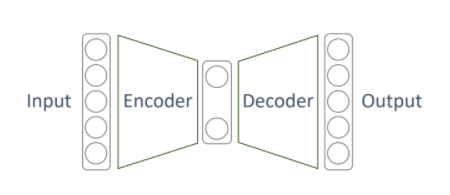

AE는 4가지의 주요 키워드로 알아볼 수 있다.
1. Unsupervised Learning : AutoEncoder를 학습할 때 오직 input Data, x만을 가지고 학습하기 때문에 Unsupervised Learning의 일종으로 볼 수 있다.

2. Manifold Learning : 학습된 AutoEncoder에서 Encoder는 차원 축소의 역할을 수행하기 때문에 고차원의 공간에서 각각의 Sample들을 잘 아우르는 Subspace가 존재한다는 가정을 가지고 학습을 진행하는 Manifold Learning의 일종으로 볼 수 있다.

3. Generative Model Learning : 학습된 AutoEncoder에서 Decoder는 압축된 차원을 복원하는 과정이 마치 생성 모델과 비슷하기 때문에 Generative Model Learning의 일종으로 불 수 있다.

4. Maximum Likelihood Density Estimation : MLE와 DNN의 학습 방법이 같으며, AutoEncoder는 DNN의 일종이며, AutoEncoder를 학습할 때 Loss는 negative ML로 해석되기 때문에 Maximum Likelihood Density Estimation 한다고 볼 수 있다.

따라서 AE의 학습 과정은 데이터를 원래의 데이터로 잘 복원하도록 학습시키는 것으로 이해할 수 있으며, 자기자신을 잘 복원할 수 있는 모델이라면 학습 과정 중에 존재하는 압축된 Feature는 Feature로써의 의미를 가진다고 볼 수 있다.

즉, AE를 활용하면 유의미한 Feature를 얻을 수 있가 때문에 Feature Extraction, Dimensionality Reduction, Visualization 등의 방식으로 사용될 수 있다.

# AutoEncoder의 변형 모델

이번 장에서는 AutoEncoder의 변형 모델 중 Variational AE, Denoising AE, Sparse AE에 대해 알아볼 예정이며, 이 밖에도 다양한 AutoEncoder의 변형 모델들이 존재한다.

- VAE : Variational AutoEncoder, VAE는 아래의 그림과 같은 구조를 가지고 있으며 AE와는 수학적으로 전혀 연관성이 없는 모델이지만 모델을 만들고 보니 그 구조가 AutoEncoder와 매우 유사한 모델이다. VAE는 AE와 같은 목적으로 사용되지는 않으며 GAN 처럼 새로운 데이터를 생성하는데 주 목적이 있는 모델로 GAN과 매우 유사한 모델로 볼 수 있다. 하지만 학습 방법과 연구의 시작 지점이 GAN과 다르기 때문에 GAN과 VAE는 유사하면서도 다른 모델로 볼 수 있다. GAN의 경우 정규분포에서 데이터를 샘플링하여 데이터를 생성하는 방식이지만 VAE의 경우 데이터를 잘 생성할 수 있는 분포를 찾는 방식이다.

- DAE : Denoising AutoEncoder, DAE는 아래의 그림과 같은 구조를 가지고 있으며 input에 약간의 noise를 추가해 학습 시킴으로써 nosie에 강건한 AutoEncoder를 만드는 모델이다.

- SAE : Sparse AutoEncoder, SAE는 아래의 그림과 같은 구조를 가지고 있으며 좀 더 다양한 Feature를 생성하기 위해서, 차원을 늘리기 위해서 사용하는데 주 목적이 있는 모델이다.

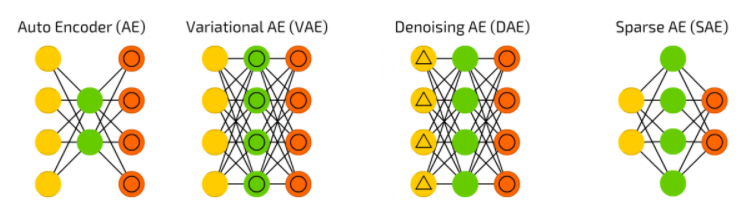

# AutoEncoder 실습

MNIST 데이터 셋을 가지고 AutoEncoder의 대표적인 기능인 차원 축소와 축소한 데이터를 Reconstruction 했을 때의 결과를 시각화하는 실습을 진행했다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
# 환경설정
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print(DEVICE)

cuda


In [ ]:
# 학습 조건 설정
BATCH_SIZE = 64
EPOCHS = 10

In [ ]:
# 데이터 다운
train_dataset = datasets.MNIST(root = '../data/MNIST',
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                                     train = False,
                                     transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# 데이터 확인
for (X_train, y_train) in train_loader:
  print('X_train:', X_train.size(), 'type:', X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break

X_train: torch.Size([64, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


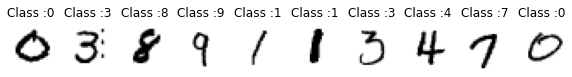

In [ ]:
# 데이터 확인
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = 'gray_r')
  plt.title('Class :' + str(y_train[i].item()))

## MLP를 Base로 만든 AutoEncoder

In [ ]:
# AutoEncoder 모델 설계
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 32),
        nn.ReLU(),
        nn.Linear(32, 2),
    )

    self.decoder = nn.Sequential(
        nn.Linear(2, 32),
        nn.ReLU(),
        nn.Linear(32, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.Linear(512, 28 * 28)
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [ ]:
# 모델 정의
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [ ]:
# 학습 정의
def train(model, train_loader, optimizer):
  model.train() # 모델을 학습상태로 지정
  train_loss = 0
  for batch_idx, (image, _) in enumerate(train_loader):
    image = image.view(-1, 28 * 28).to(DEVICE)
    target = image.view(-1, 28 * 28).to(DEVICE)
    optimizer.zero_grad()
    encoded, decoded = model(image)
    loss = criterion(decoded, target)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  train_loss /= len(train_loader)
  return train_loss

In [ ]:
# 평가 정의
def evaluate(model, test_loader):
  model.eval() # 모델을 평가상태로 지정
  test_loss = 0
  real_image = []
  gen_image = []
  encoded_li = [] 
  label_li = []
  with torch.no_grad(): # 모델을 평가하는 단계에서 기울기를 통해 파라미터 값이 업데이트 되는 현상을 방지하기 위해서 지정, Gradient의 흐름을 억제
    for image, label in test_loader:
      image = image.view(-1, 28 * 28).to(DEVICE)
      target = image.view(-1, 28 * 28).to(DEVICE)
      optimizer.zero_grad()
      encoded, decoded = model(image)

      test_loss += criterion(decoded, target).item()
      real_image.append(image.to("cpu"))
      gen_image.append(decoded.to('cpu'))
      encoded_li.append(encoded.to('cpu'))
      label_li.append(label.to('cpu'))

  test_loss /= len(test_loader)
  return test_loss, real_image, gen_image, encoded_li, label_li

### AutoEncoder 학습을 실행하며 Test Set의 Reconstruction Error 확인 및 차원 축소 결과 시각화


[EPOCH: 1], 	Train Loss: 0.0496, 	Test Loss: 0.0437


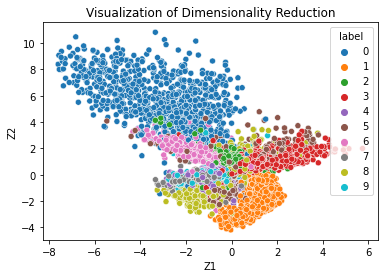

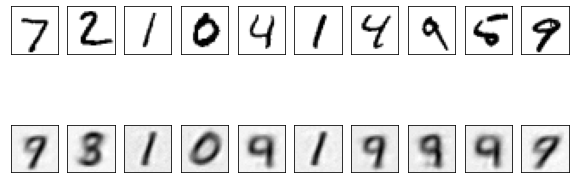


[EPOCH: 2], 	Train Loss: 0.0420, 	Test Loss: 0.0407


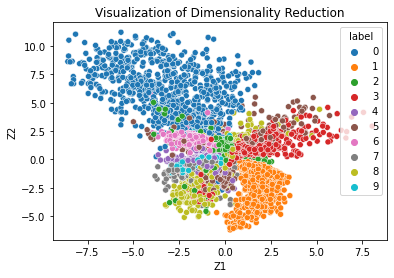

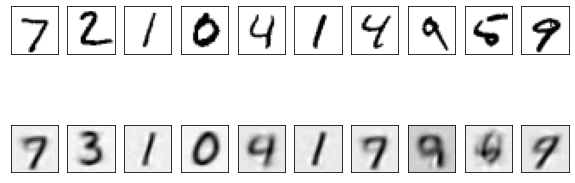


[EPOCH: 3], 	Train Loss: 0.0398, 	Test Loss: 0.0390


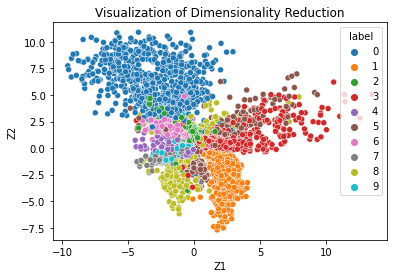

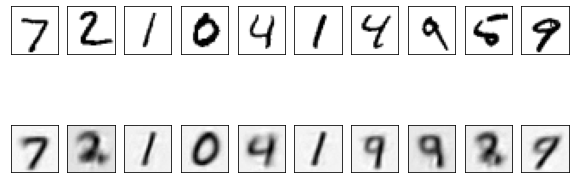


[EPOCH: 4], 	Train Loss: 0.0386, 	Test Loss: 0.0384


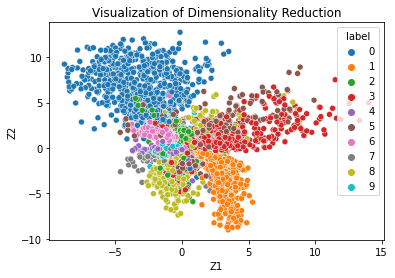

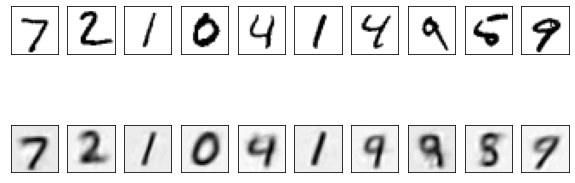


[EPOCH: 5], 	Train Loss: 0.0376, 	Test Loss: 0.0373


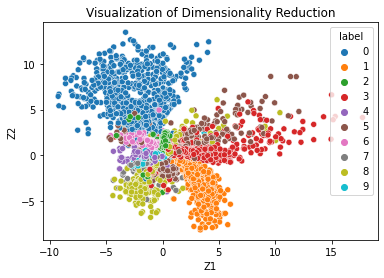

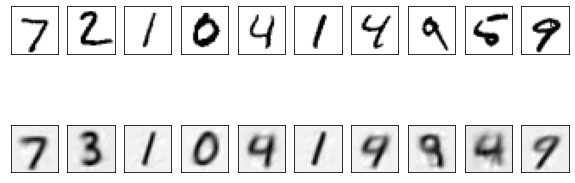


[EPOCH: 6], 	Train Loss: 0.0372, 	Test Loss: 0.0375


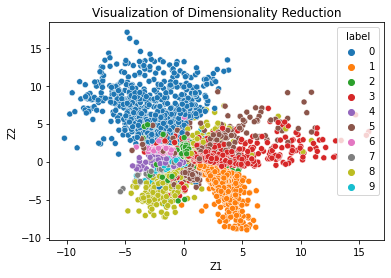

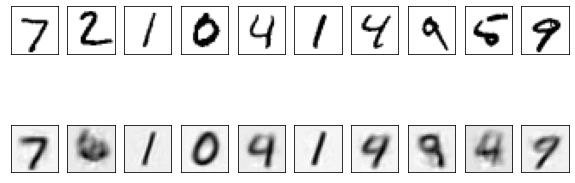


[EPOCH: 7], 	Train Loss: 0.0370, 	Test Loss: 0.0367


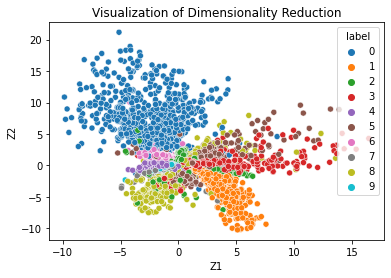

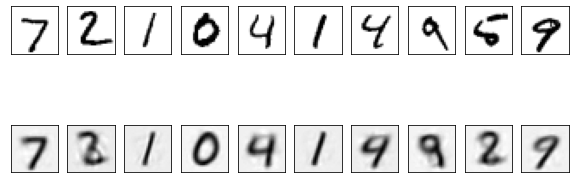


[EPOCH: 8], 	Train Loss: 0.0363, 	Test Loss: 0.0360


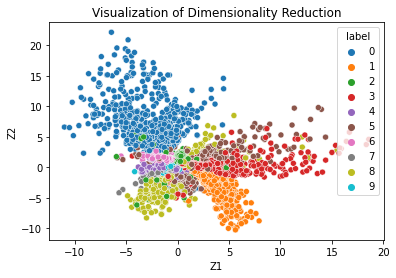

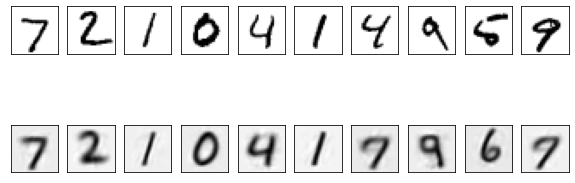


[EPOCH: 9], 	Train Loss: 0.0361, 	Test Loss: 0.0363


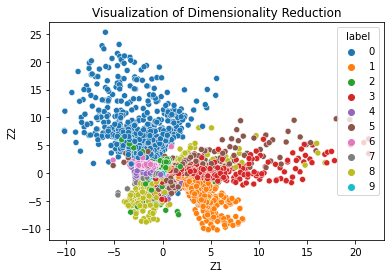

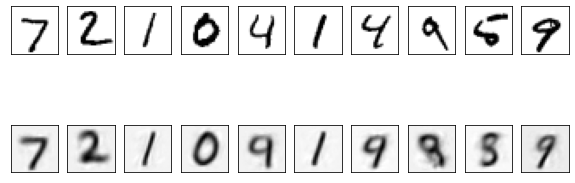


[EPOCH: 10], 	Train Loss: 0.0358, 	Test Loss: 0.0361


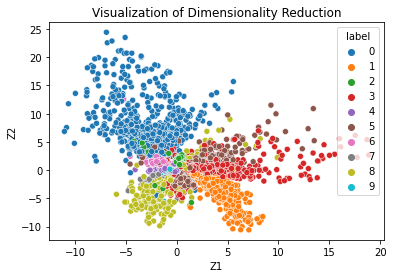

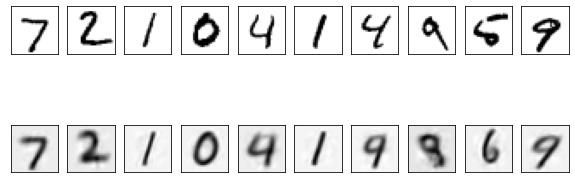

In [ ]:
# 학습 및 평가
for epoch in range(1, EPOCHS + 1):
  train_loss = train(model, train_loader, optimizer)
  test_loss, real_image, gen_image, encoded_li, label_li = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTest Loss: {test_loss:.4f}")

  # 차원축소 시각화
  encoded_li = torch.cat(encoded_li, dim = 0).numpy()
  label_li = torch.cat(label_li).numpy().reshape(-1,1)
  df = np.concatenate([encoded_li, label_li], axis=1)
  df = pd.DataFrame(df, columns=['Z1', 'Z2', 'label'])
  df['label'] = df['label'].astype('int').astype('str')
  sort_label = [ str(i) for i in sorted(df['label'].unique().astype('int'))]
  sns.scatterplot(x = 'Z1', y = 'Z2', data = df, hue='label', hue_order = sort_label)
  plt.title('Visualization of Dimensionality Reduction')
  plt.show()

  # 이미지 시각화
  f, a = plt.subplots(2, 10, figsize = (10, 4))
  for i in range(10):
    img = np.reshape(real_image[0][i], (28, 28))
    a[0][i].imshow(img, cmap = "gray_r")
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

  for i in range(10):
    img = np.reshape(gen_image[0][i], (28, 28))
    a[1][i].imshow(img, cmap = "gray_r")
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
  plt.show()

MLP를 Base로 만든 AutoEncoder의 경우 Latent Space가 가운데로 쏠려 있다는 것을 확인할 수 있으며 Epoch이 증가함에 따라서 인코딩과 디코딩이 더 잘된다는 것을 시각적으로 확인할 수 있다.

## CNN을 Base로 만든 AutoEncoder

In [ ]:
# AutoEncoder 모델 설계
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,3,padding=1),   # batch x 16 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.Conv2d(16,32,3,padding=1),  # batch x 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(32),
        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x 28 x 28
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2,2),   # batch x 64 x 14 x 14
        nn.Conv2d(64,128,3,padding=1),  # batch x 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(2,2),
        nn.Conv2d(128,256,3,padding=1),  # batch x 256 x 7 x 7
        nn.ReLU()
    )

    self.encoder_fc = nn.Sequential(
        nn.Linear(256 * 7 * 7, 2)
    )

    self.decoder_fc = nn.Sequential(
        nn.Linear(2, 256 * 7 * 7)
    )

    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(256,128,3,2,1,1), # batch x 128 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.ConvTranspose2d(128,64,3,1,1), # batch x 64 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.ConvTranspose2d(64,16,3,1,1), # batch x 16 x 14 x 14
        nn.ReLU(),
        nn.BatchNorm2d(16),
        nn.ConvTranspose2d(16,1,3,2,1,1), # batch x 1 x 28 x 28
        nn.ReLU()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    encoded = self.encoder_fc(encoded.view(-1, 256 * 7 * 7))

    decoded = self.decoder_fc(encoded)
    decoded = self.decoder(decoded.view(-1, 256, 7, 7))
    return encoded, decoded.view(-1, 1 * 28 * 28)

In [ ]:
# 모델 정의
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

print(model)

AE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
# 학습 정의
def train(model, train_loader, optimizer):
  model.train() # 모델을 학습상태로 지정
  train_loss = 0
  for batch_idx, (image, _) in enumerate(train_loader):
    image = image.to(DEVICE)
    target = image.view(-1, 28 * 28).to(DEVICE)
    optimizer.zero_grad()
    encoded, decoded = model(image)
    loss = criterion(decoded, target)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()

  train_loss /= len(train_loader)
  return train_loss

In [ ]:
# 평가 정의
def evaluate(model, test_loader):
  model.eval() # 모델을 평가상태로 지정
  test_loss = 0
  real_image = []
  gen_image = []
  encoded_li = [] 
  label_li = []
  with torch.no_grad(): # 모델을 평가하는 단계에서 기울기를 통해 파라미터 값이 업데이트 되는 현상을 방지하기 위해서 지정, Gradient의 흐름을 억제
    for image, label in test_loader:
      image = image.to(DEVICE)
      target = image.view(-1, 28 * 28).to(DEVICE)
      optimizer.zero_grad()
      encoded, decoded = model(image)

      test_loss += criterion(decoded, target).item()
      real_image.append(image.to("cpu"))
      gen_image.append(decoded.to('cpu'))
      encoded_li.append(encoded.to('cpu'))
      label_li.append(label.to('cpu'))

  test_loss /= len(test_loader)
  return test_loss, real_image, gen_image, encoded_li, label_li

### AutoEncoder 학습을 실행하며 Test Set의 Reconstruction Error 확인 및 차원 축소 결과 시각화


[EPOCH: 1], 	Train Loss: 0.0677, 	Test Loss: 0.0551


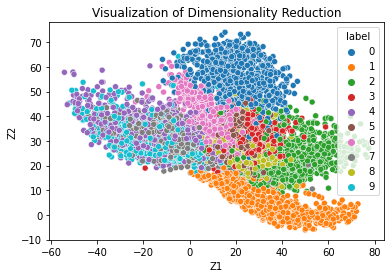

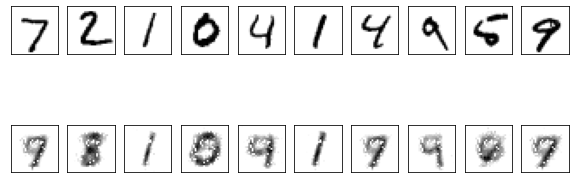


[EPOCH: 2], 	Train Loss: 0.0502, 	Test Loss: 0.0464


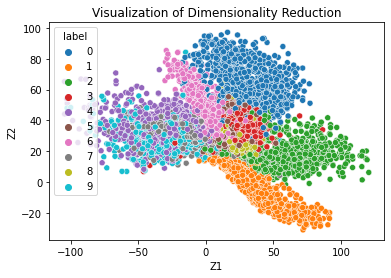

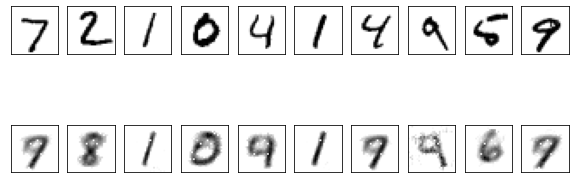


[EPOCH: 3], 	Train Loss: 0.0456, 	Test Loss: 0.0431


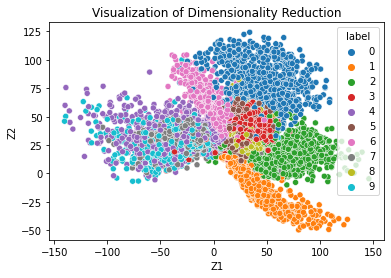

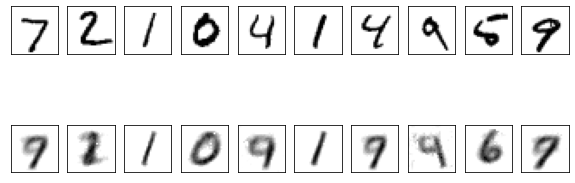


[EPOCH: 4], 	Train Loss: 0.0429, 	Test Loss: 0.0423


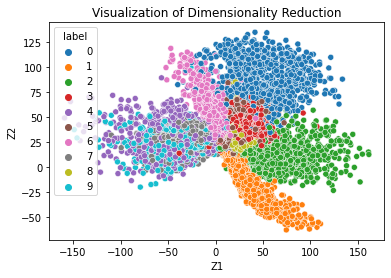

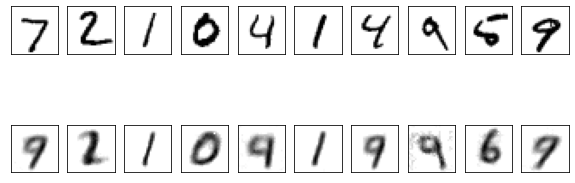


[EPOCH: 5], 	Train Loss: 0.0420, 	Test Loss: 0.0412


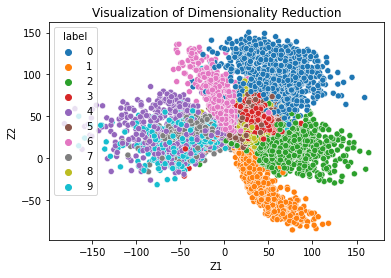

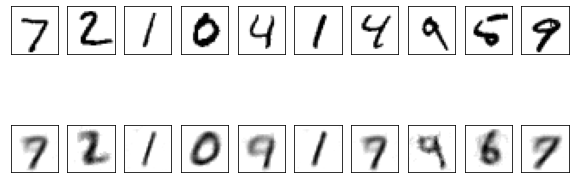


[EPOCH: 6], 	Train Loss: 0.0413, 	Test Loss: 0.0404


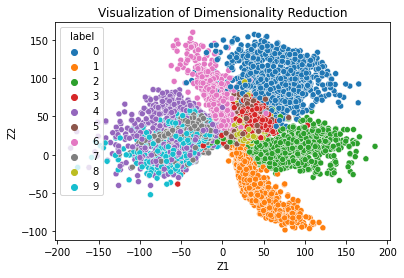

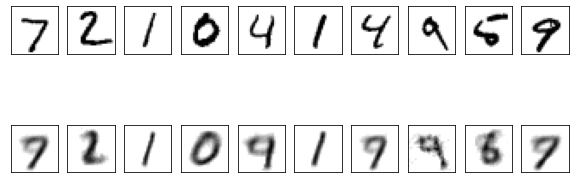


[EPOCH: 7], 	Train Loss: 0.0406, 	Test Loss: 0.0402


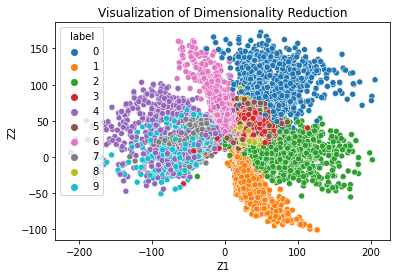

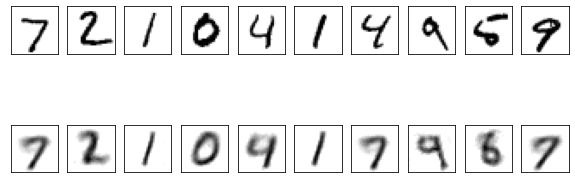


[EPOCH: 8], 	Train Loss: 0.0402, 	Test Loss: 0.0396


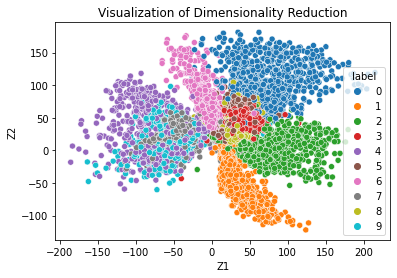

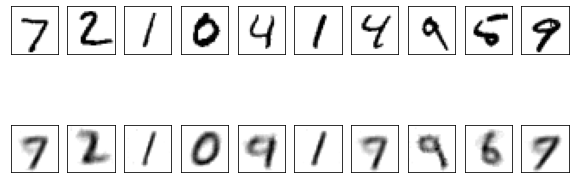


[EPOCH: 9], 	Train Loss: 0.0397, 	Test Loss: 0.0392


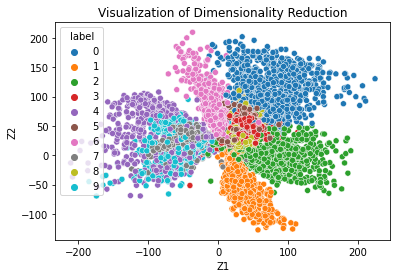

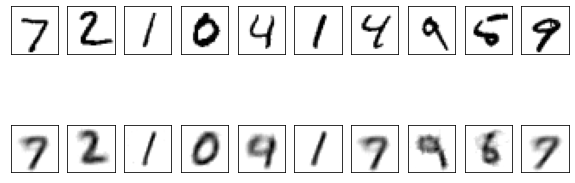


[EPOCH: 10], 	Train Loss: 0.0394, 	Test Loss: 0.0390


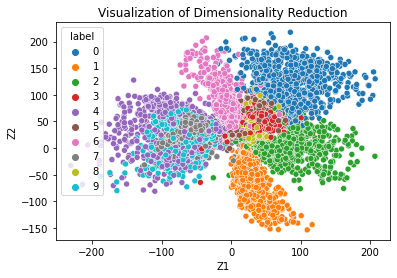

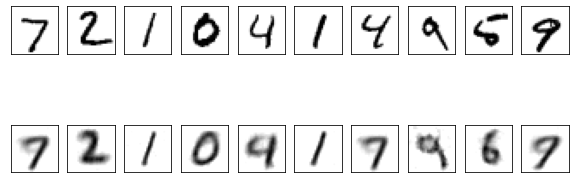

In [ ]:
# 학습 및 평가
for epoch in range(1, EPOCHS + 1):
  train_loss = train(model, train_loader, optimizer)
  test_loss, real_image, gen_image, encoded_li, label_li = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTest Loss: {test_loss:.4f}")

  # 차원축소 시각화
  encoded_li = torch.cat(encoded_li, dim = 0).numpy()
  label_li = torch.cat(label_li).numpy().reshape(-1,1)
  df = np.concatenate([encoded_li, label_li], axis=1)
  df = pd.DataFrame(df, columns=['Z1', 'Z2', 'label'])
  df['label'] = df['label'].astype('int').astype('str')
  sort_label = [ str(i) for i in sorted(df['label'].unique().astype('int'))]
  sns.scatterplot(x = 'Z1', y = 'Z2', data = df, hue='label', hue_order = sort_label)
  plt.title('Visualization of Dimensionality Reduction')
  plt.show()

  # 이미지 시각화
  f, a = plt.subplots(2, 10, figsize = (10, 4))
  for i in range(10):
    img = np.reshape(real_image[0][i], (28, 28))
    a[0][i].imshow(img, cmap = "gray_r")
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

  for i in range(10):
    img = np.reshape(gen_image[0][i], (28, 28))
    a[1][i].imshow(img, cmap = "gray_r")
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
  plt.show()

CNN을 Base로 만든 AutoEncoder와 MLP 기반의 AutoEncoder가 나타내는 각각의  Latent Space가 다르다는 것을 확인할 수 있으며 Epoch이 증가함에 따라서 인코딩과 디코딩이 더 잘된다는 것을 시각적으로 확인할 수 있다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 1, https://www.youtube.com/playlist?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- T아카데미 Scikit-Learn으로 다지는 머신러닝 기초, 강천성, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action
- Pytorch로 시작하는 딥 러닝 입문, 유원준, https://wikidocs.net/book/2788
- 오토인코더의 모든 것 1 ~ 3, 이활석(NAVER), https://www.youtube.com/watch?v=o_peo6U7IRM&t=1s
- T아카데미 딥러닝을 위한 PyTorch 활용법, 최건호, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=128
- https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/08_Autoencoder/1_Convolutional_Autoencoder.ipynb
- https://en.wikipedia.org/wiki/Autoencoder